In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import cv2

In [101]:
def slices(imageToSlice):
    imageShape = imageToSlice.shape

    print("Image to slice shape: " + str(imageShape))

    middleSliceLocations = np.floor(np.divide(imageShape, 2)).astype(int)

    resultDictionary = {}
    resultDictionary["xz"] = imageToSlice[:, :, middleSliceLocations[2]]
    resultDictionary["xy"] = imageToSlice[middleSliceLocations[0], :, :]
    resultDictionary["yz"] = imageToSlice[:, middleSliceLocations[1], :]

    return resultDictionary


Image to slice shape: (129, 227, 198)


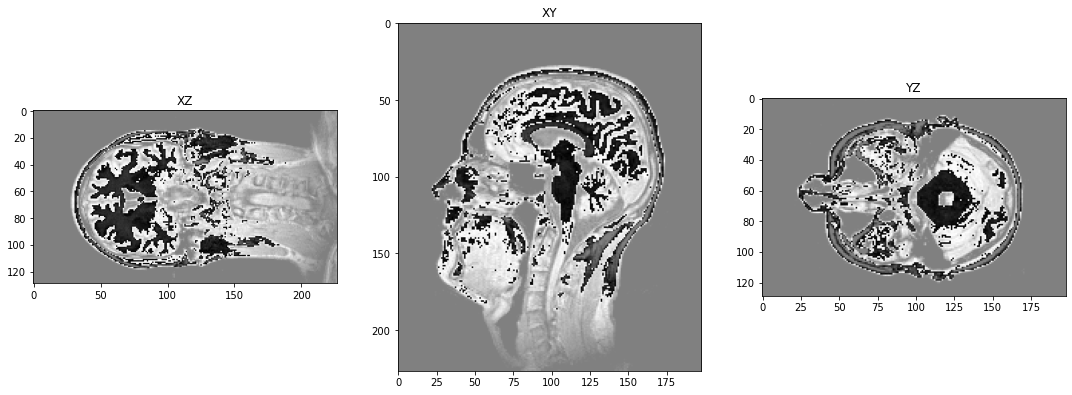

In [102]:
image_path = "whatisit_129x227x198_8bit.raw"
image = np.fromfile(image_path, dtype="int8", sep="").reshape((129, 227, 198))
middleSlices = slices(image)

fig, axarr = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
axarr[0].set_title("XZ")
axarr[0].imshow(middleSlices["xz"], cmap=cm.gray)
axarr[1].set_title("XY")
axarr[1].imshow(middleSlices["xy"], cmap=cm.gray)
axarr[2].set_title("YZ")
axarr[2].imshow(middleSlices["yz"], cmap=cm.gray)

plt.show()


In [103]:
# Generate pgm image files
image_path = "whatisit_129x227x198_8bit.raw"
image = np.fromfile(image_path, dtype="int8", sep="").reshape((129, 227, 198))
middleSlices = slices(image)

cv2.imwrite("xz.pgm", middleSlices["xz"])
cv2.imwrite("xy.pgm", middleSlices["xy"])
cv2.imwrite("yz.pgm", middleSlices["yz"])

Image to slice shape: (129, 227, 198)


True